<a href="https://colab.research.google.com/github/tremblay17/Machine-Learning-Projects/blob/main/StockPrediction-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Installs
%pip install yfinance

In [3]:
#@title Imports
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import pandas as pd
from google.colab import widgets
import ipywidgets as widgets
from IPython.display import display, clear_output

In [4]:
#@title Functions

def create_dataset(dataset, step):
    x_train, y_train = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        x_train.append(a)
        y_train.append(dataset[i + step, 0])
    return np.array(x_train), np.array(y_train)

def plot1(PST, timeframe):
  if PST:
    timeframe.plot()
    plt.ylabel("Price")
    plt.title(f"Plain {ticker} {Timeframe} Plot")

def PlotPred(prediction3mo, ticker, Plot_Prediction, PS3, data):
  predictedPrice = round(float(*prediction3mo[len(prediction3mo)-1]),2)
  if Plot_Prediction and PS3:
    fig, axs = plt.subplots(1, figsize=(10,6))
    plt.plot(prediction3mo,)
    plt.ylabel("Price ($)")
    #coef = len(prediction3mo)
    #tData = pd.to_datetime(data.index)
    #timeData = data.index[]
    #plt.xlabel(tData)
    plt.title(f"{ticker}'s predicted price, 3 months shown")
    plt.axvline(len(prediction3mo)-30)
    plt.axhline(y=prediction3mo[len(prediction3mo)-1], color = 'blue', linestyle = ':', label = f'NEXT 30D: {predictedPrice}')
    plt.legend()
  else:
    print(f"Predicted Price for {ticker} in one month's time: ${predictedPrice} ")

def PlotPred2(prediction1y, ticker, Plot_Prediction, PS1, data):
  predictedPrice = round(float(*prediction1y[len(prediction1y)-1]),2)
  if Plot_Prediction and PS1:
    fig, axs = plt.subplots(1, figsize=(10,6))
    plt.plot(prediction1y,)
    plt.ylabel("Price ($)")
    #plt.xlabel(data['Date'])
    plt.title(f"{ticker}'s predicted price, 1 year shown")
    plt.axvline(len(prediction1y)-30)
    plt.axhline(y=prediction1y[len(prediction1y)-1], color = 'blue', linestyle = ':', label = f'NEXT 30D: {predictedPrice}')
    plt.legend()
  else:
    print(f"Predicted Price for {ticker} in one month's time: ${predictedPrice}")

In [5]:
#@title User Input { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
Desired_Ticker = 'NVDA' #@param {type:"string"}
ticker = Desired_Ticker

Training_Period = '5y' #@param ['5y', '2y', '10y', 'max']

Timeframe = 'Close' #@param ['Close', 'Open']

Epochs = 20 #@param {type:"slider", min:1, max:100, step:1}
epochAMT = Epochs
Batch = 64 #@param {type:"slider", min:1, max:128, step:1}

In [6]:
#@title User Options { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
Plot_Selected_Timeframe_Plain = True #@param {type:"boolean"}
PST = Plot_Selected_Timeframe_Plain
Plot_Pre_Prediction = True #@param {type:"boolean"}
PPP = Plot_Pre_Prediction
Plot_Unscaled_Prediction = True #@param {type:"boolean"}
PUP = Plot_Unscaled_Prediction
Plot_Final_Prediction = True #@param {type:"boolean"}
Plot_Prediction = Plot_Final_Prediction

PS1 = False; PS3 = False
Final_Prediction_Scale_1Year = True #@param {type:"boolean"}
Final_Prediction_Scale_3Months = True #@param {type:"boolean"}
if Final_Prediction_Scale_1Year:
  PS1 = True
if Final_Prediction_Scale_3Months:
  PS3 = True

In [7]:
#@title Data Processing
data = yf.download(tickers=ticker, period=Training_Period, interval='1d', progress=False)
timeframe = data[[Timeframe]]
ds = timeframe.values

normalization = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalization.fit_transform(np.array(ds).reshape(-1,1))

train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

time_step = 100
X_train, y_train = create_dataset(ds_train, time_step)
X_test, y_test = create_dataset(ds_test, time_step)

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


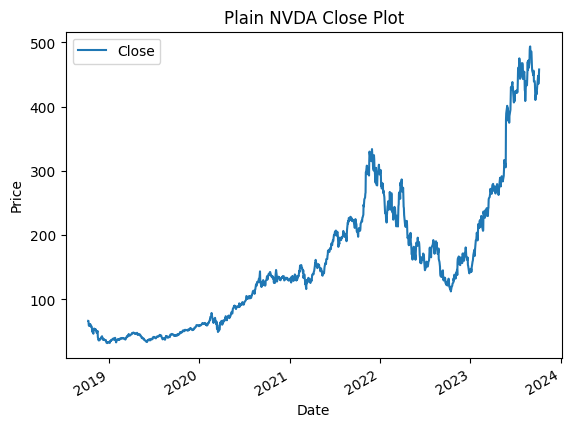

In [8]:
#@title Plain Plot
plot1(PST, timeframe) # plots plain open/close graph

In [9]:
#@title Training
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochAMT,batch_size=Batch)

Epoch 1/20
13/13 [==============================] - 22s 655ms/step - loss: 0.0182 - val_loss: 0.0409
Epoch 2/20
13/13 [==============================] - 5s 371ms/step - loss: 0.0027 - val_loss: 0.0050
Epoch 3/20
13/13 [==============================] - 2s 191ms/step - loss: 0.0012 - val_loss: 0.0067
Epoch 4/20
13/13 [==============================] - 3s 276ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 5/20
13/13 [==============================] - 3s 212ms/step - loss: 9.4415e-04 - val_loss: 0.0083
Epoch 6/20
13/13 [==============================] - 4s 290ms/step - loss: 0.0013 - val_loss: 0.0088
Epoch 7/20
13/13 [==============================] - 3s 193ms/step - loss: 9.9879e-04 - val_loss: 0.0046
Epoch 8/20
13/13 [==============================] - 3s 196ms/step - loss: 8.1861e-04 - val_loss: 0.0041
Epoch 9/20
13/13 [==============================] - 2s 193ms/step - loss: 8.4497e-04 - val_loss: 0.0041
Epoch 10/20
13/13 [==============================] - 3s 244ms/step - loss: 7.5006e-

In [10]:
#@title Predictions
training_prediction = model.predict(X_train)
testing_prediction = model.predict(X_test)
training_prediction = normalization.inverse_transform(training_prediction)
testing_prediction = normalization.inverse_transform(testing_prediction)

test = np.vstack((training_prediction,testing_prediction))

minhun = len(ds_test) - 100
fut_inp = ds_test[minhun:]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
tmp_inp = tmp_inp[0].tolist()

9/9 [==============================] - 0s 38ms/step


In [11]:
#@title Layering
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

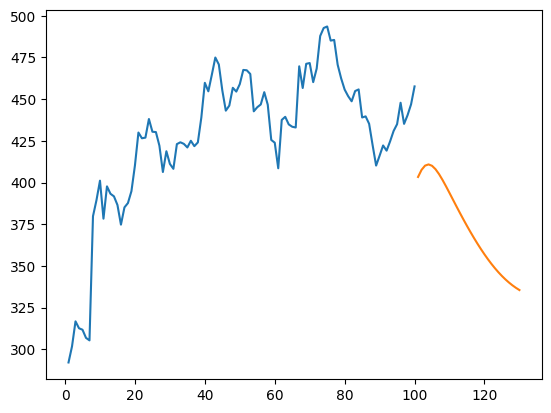

In [12]:
#@title Plotting Pre-Prediction
plot_new = np.arange(1,101)
plot_pred = np.arange(101,131)
minhun2 = len(ds_scaled) - 100
if PPP:
  plt.plot(plot_new, normalization.inverse_transform(ds_scaled[minhun2:]))
  plt.plot(plot_pred, normalization.inverse_transform(lst_output))


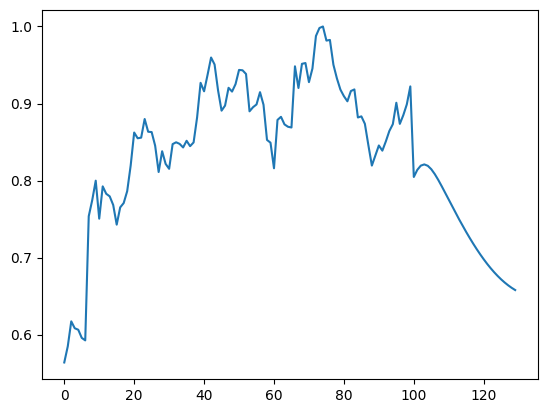

In [13]:
#@title Plotting Prediction (unscaled)
ds_new = ds_scaled.tolist()
ds_new.extend(lst_output)
extend_length = len(ds_new) - 130
if PUP:
  plt.plot(ds_new[extend_length:])

In [14]:
#@title Prediction Scaling
prev3mo = len(ds_new) - 92
prev1y = len(ds_new) - 335
prediction1y = normalization.inverse_transform(ds_new[prev1y:]).tolist()
prediction3mo = normalization.inverse_transform(ds_new[prev3mo:]).tolist()

	Current Day Shown via Horizontal Line

		Current Day: 


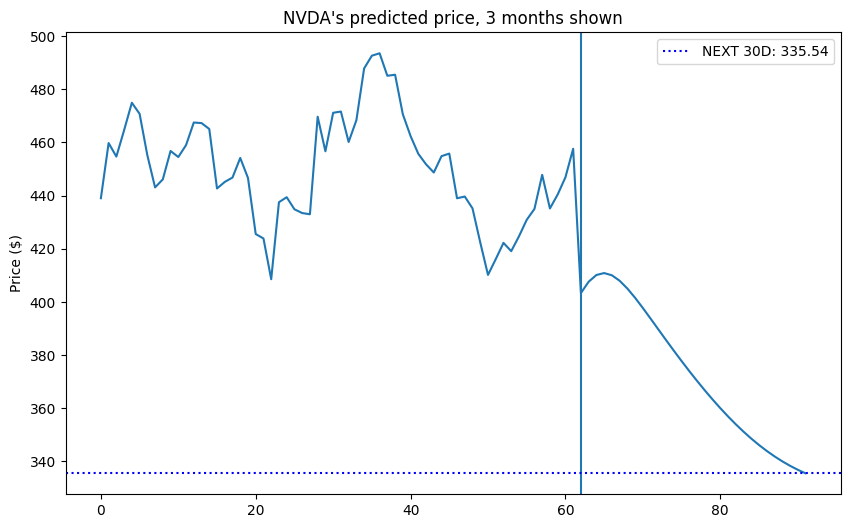

In [15]:
#@title 3 Month Scale
print("\tCurrent Day Shown via Horizontal Line\n")
print(f"\t\tCurrent Day: ")
PlotPred(prediction3mo, ticker, Plot_Prediction, PS3, data)

	Current Day Shown via Horizontal Line



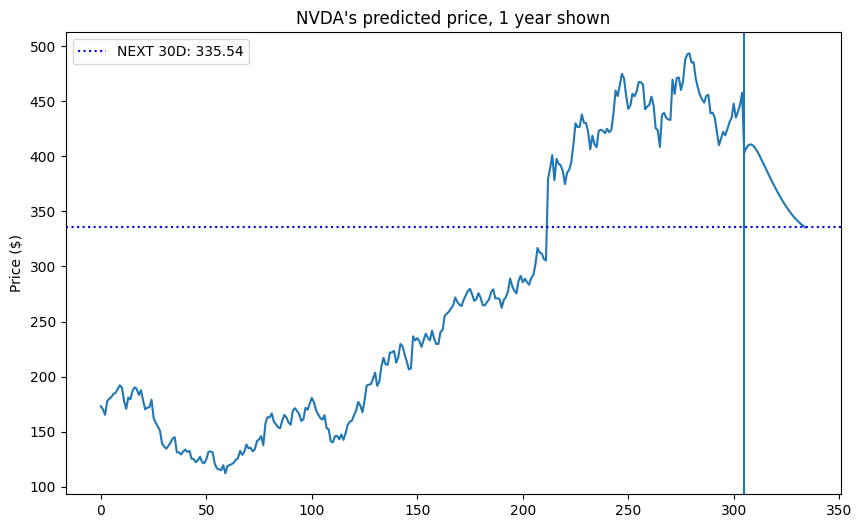

In [16]:
#@title 1 Year Scale
print("\tCurrent Day Shown via Horizontal Line\n")
PlotPred2(prediction1y, ticker, Plot_Prediction, PS1, data)